In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#preprocessing steps
df.shape
df.shape[0]

891

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# percentage null value
(df.isnull().sum()/df.shape[0])*100

Unnamed: 0      0.000000
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
#total null value
df.notnull().sum()

Unnamed: 0     891
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df.isnull().sum().sum() # total null value

866

In [9]:
#total notnull value
df.notnull().sum().sum()

10717

In [10]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100 # overall percent of null values in our dataset

7.47647414314081

<function matplotlib.pyplot.show(close=None, block=None)>

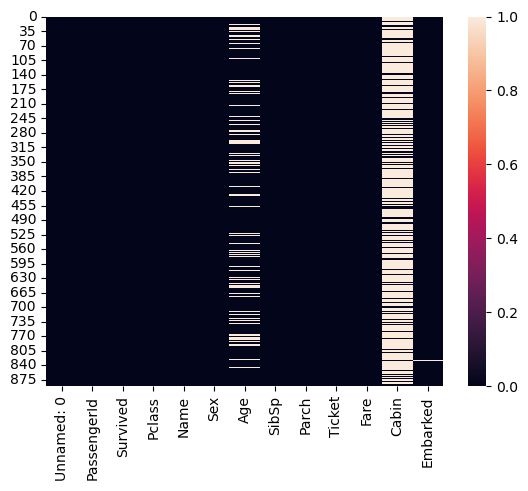

In [11]:
sns.heatmap(df.isnull())
plt.show

In [12]:

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df['Age'].mean()
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [15]:
#50% data is null then remove that column and remove useless column
df.drop(columns=['Unnamed: 0','Name','Ticket','Cabin'],inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [20]:
df['Embarked']= le.fit_transform(df['Embarked'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


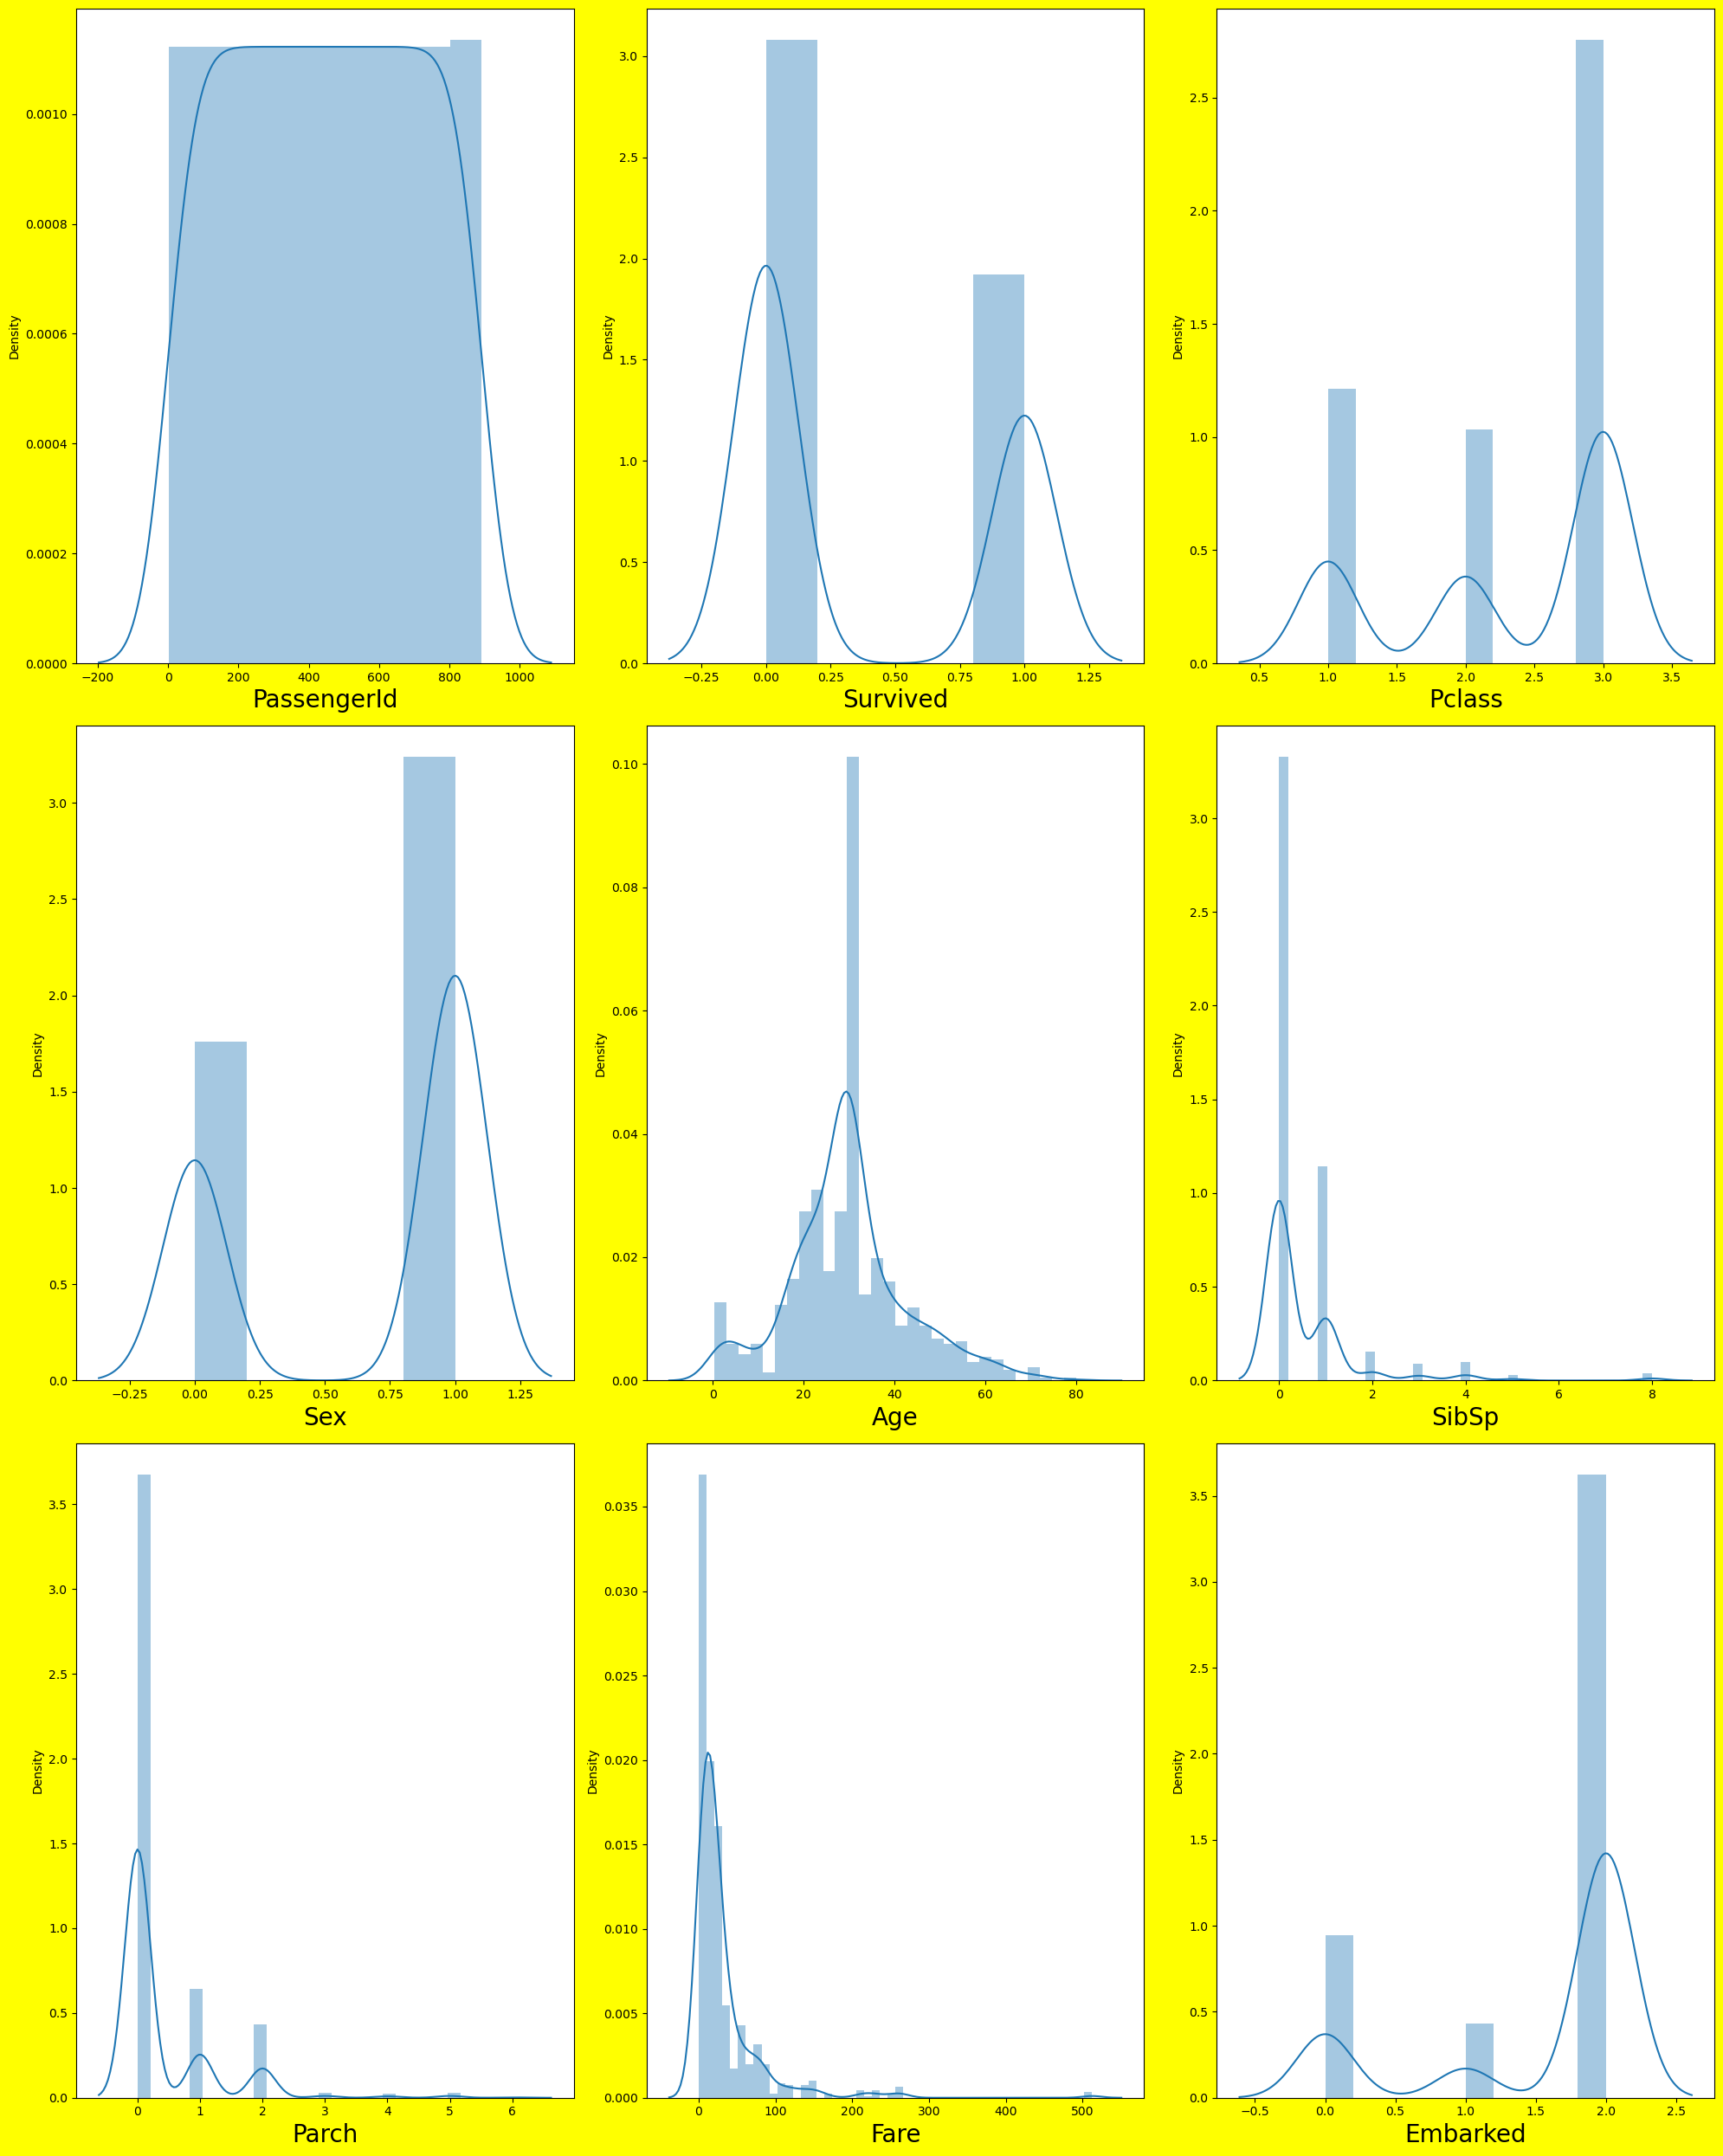

In [23]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [25]:
df_features = df.drop('Survived',axis=1)

<Axes: >

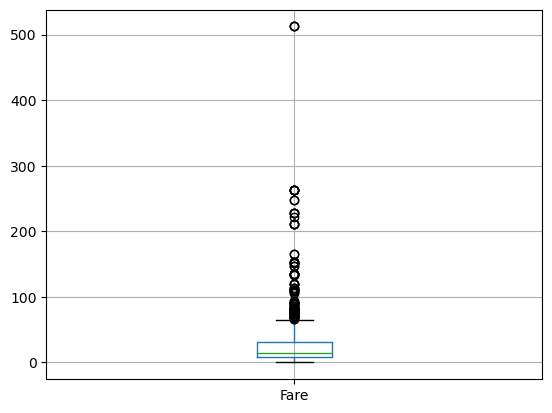

In [26]:
# check outliers
# Visualize the outliers using boxplot
df.boxplot(column='Fare')

In [27]:
X= df.drop(columns = ['Survived'])
y = df['Survived']

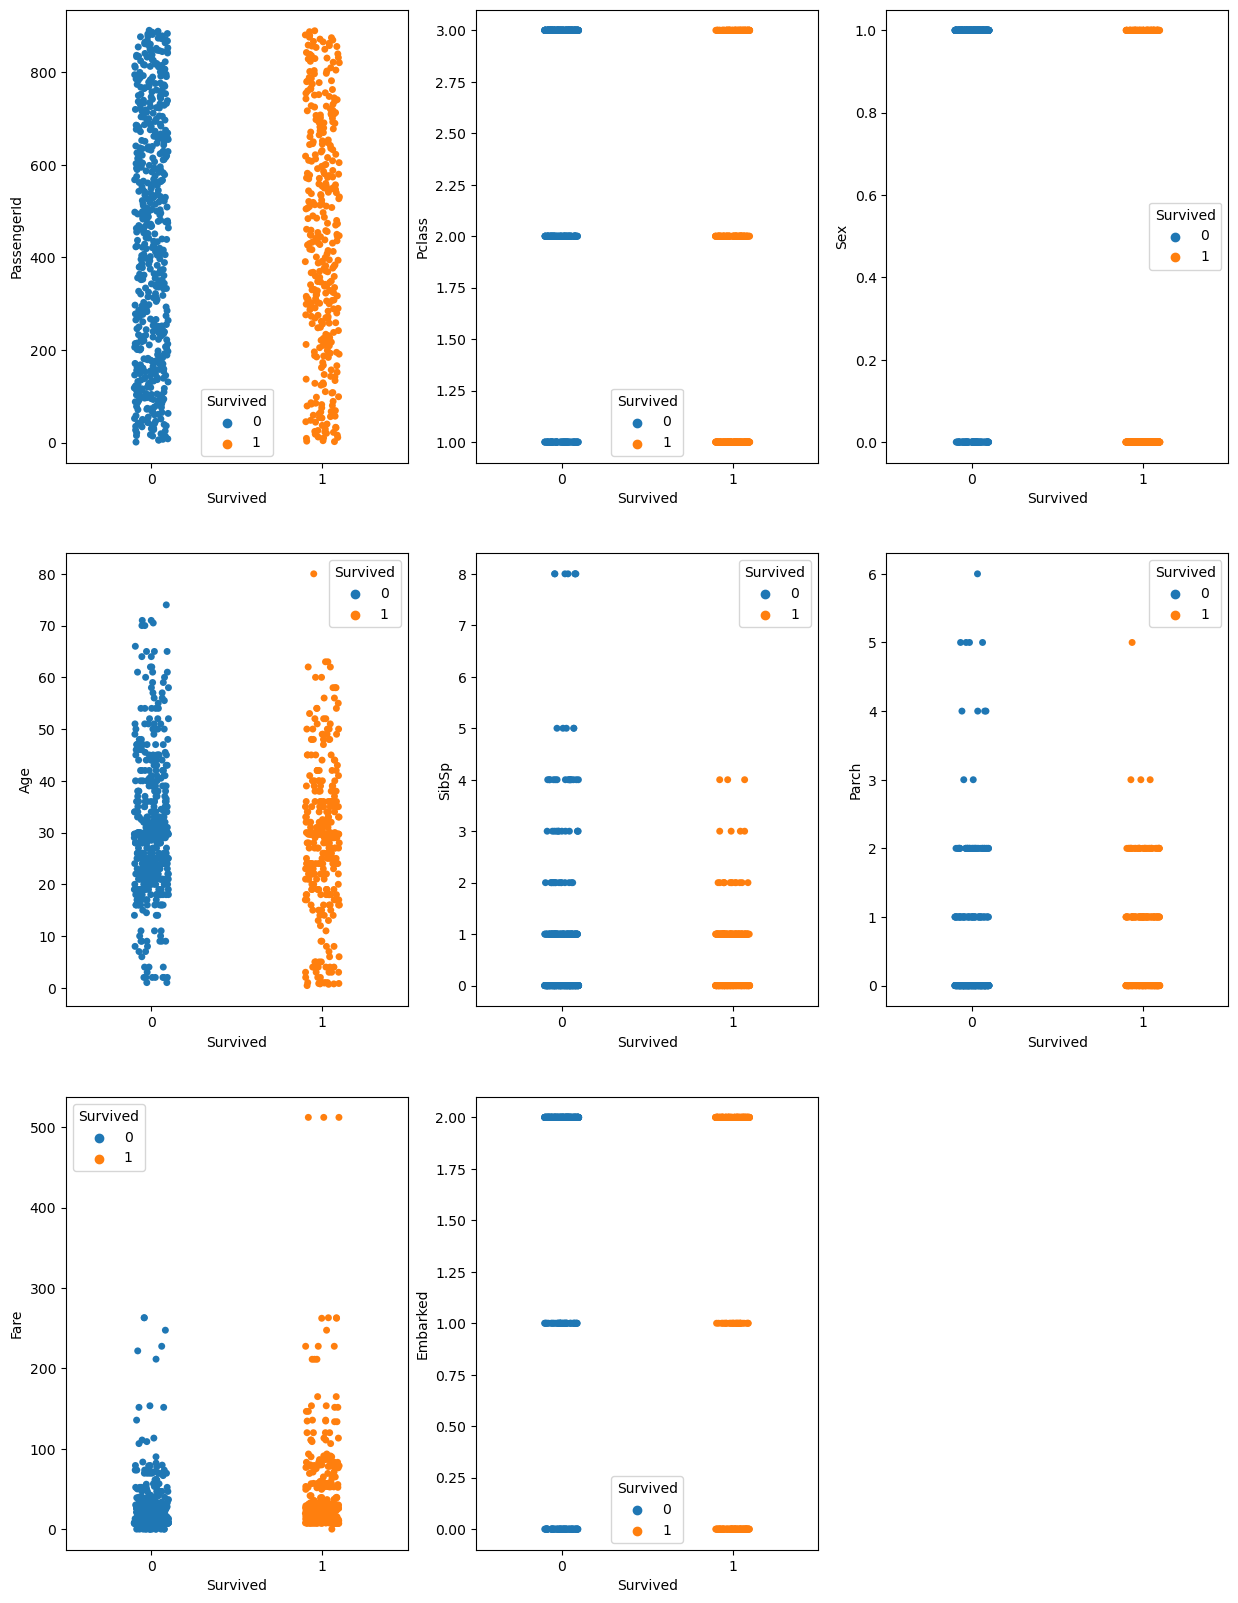

In [28]:
# 
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column],hue=y)
        
        
    plotnumber+=1
plt.show()

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled.shape[1]

8

In [31]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.007572,PassengerId
1,1.672534,Pclass
2,1.111141,Sex
3,1.205739,Age
4,1.286613,SibSp
5,1.323890,Parch
6,1.648801,Fare
7,1.079669,Embarked


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)
y_train.head()

869    1
754    1
24     0
38     0
806    0
Name: Survived, dtype: int64

In [33]:
log_reg = LogisticRegression()


log_reg.fit(x_train,y_train)

LogisticRegression()

In [34]:
# write one function and call as many as time to check accuracy_score of different models.
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============Train Result====================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:2f}%")
        
        
    elif train==False:
        
        pred = clf.predict(x_test)
        
        print("\n===============Test Result====================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred,digits=2))
        

In [35]:
from sklearn.ensemble import RandomForestClassifier
# initiate randomforestclassifier and train

random_clf = RandomForestClassifier()

# train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
# call the function and pass dataset to check train and test score
metric_score(random_clf,x_train, x_test,y_train,y_test,train=True) #this is for training score

metric_score(random_clf,x_train, x_test,y_train,y_test,train=False) #this is for testing score




===============Train Result====================
Accuracy Score: 100.000000%

===============Test Result====================
Accuracy Score: 79.820628%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       145
           1       0.70      0.73      0.72        78

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [37]:
# Random forest classifier
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
           'max_depth':[10,15],
            'min_samples_split':[10,11],        
            'min_samples_leaf':[5,6],
}



In [38]:
grd = GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params = > ', grd.best_params_)

best_params = >  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}


In [39]:
random_clf = grd.best_estimator_

random_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=15)

In [40]:
#call the function and pass dataset to check train test score
# call the function and pass dataset to check train and test score
metric_score(random_clf,x_train, x_test,y_train,y_test,train=True) #this is for training score

metric_score(random_clf,x_train, x_test,y_train,y_test,train=False) #this is for testing score




===============Train Result====================
Accuracy Score: 87.275449%

===============Test Result====================
Accuracy Score: 79.372197%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.74      0.63      0.68        78

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.79      0.79      0.79       223



In [45]:
#load your data and split it into training and testing sets
X= df.drop(columns = ['Survived'], axis=1)
y = df['Survived']
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score,auc
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size = 0.25,random_state= 52)

#train your models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


Threshold of  Logistic Regression [       inf 0.98977032 0.82818785 0.82711009 0.73572862 0.72877321
 0.72695088 0.72370759 0.71598963 0.71486807 0.7135867  0.71093233
 0.7038251  0.7036291  0.6864142  0.65942317 0.63572467 0.62254403
 0.61972    0.61796341 0.60454843 0.60336007 0.60182513 0.59879099
 0.59367505 0.5934547  0.58576978 0.58049718 0.56728705 0.56641389
 0.53948453 0.53474425 0.45784783 0.45512832 0.44161507 0.42315017
 0.41576178 0.39565269 0.38823729 0.35478611 0.35389965 0.34788491
 0.3227625  0.31968027 0.31707828 0.30155378 0.29326286 0.24245843
 0.23443527 0.23336705 0.23238949 0.23074128 0.23020188 0.17149759
 0.17118481 0.16168969 0.1597543  0.15689151 0.15667904 0.14498693
 0.14402093 0.13880216 0.13857174 0.13703892 0.13611585 0.12938125
 0.12827019 0.12513468 0.12511178 0.12019012 0.11922471 0.11894467
 0.1181283  0.11739856 0.11594153 0.1143849  0.11238382 0.10565444
 0.10544979 0.10246846 0.10201499 0.06465005]
Threshold of  Random Forest [ inf 1.   0.99 0.96 

<function matplotlib.pyplot.show(close=None, block=None)>

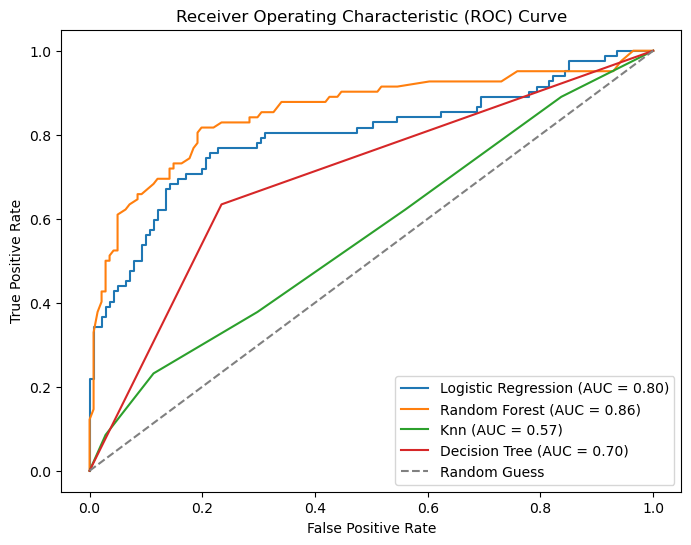

In [46]:
models = {'Logistic Regression': lr, 'Random Forest': rf,'Knn':kn,'Decision Tree':dt}

#calculate the Roc curves and Auc scores for each model
plt.figure(figsize=(8, 6))
for name, model in models.items():                        #Read key and values from the item
    model.fit(x_train, y_train)                           # Each model training
    y_prob = model.predict_proba(x_test)[:,1]             # predict prob of each model
    fpr, tpr, _ = roc_curve(y_test, y_prob)               # Finding false and true positive rate('_' is threshold)
    print('Threshold of ' ,name, _)
    roc_auc = auc(fpr, tpr)                               # auc score of each model captured
    
    
    # plot the ROC curve
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    
#Add labels and legend to the plot
plt.plot([0,1],[0,1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

#show the plot
plt.show

In [54]:
#saving the model to the local file system

pickle.dump(df, open('titanic_pred_csv', 'wb'))